### Import pandas library

This line is to get the pandas tool ready to use in our project.  

In [42]:
import pandas as pd



We open the clean data files for Math and Portuguese using pd.read_csv().
We save the data in math_df and por_df.
Then, we print the shape (size) of each dataset.
This shows how many rows and columns are in the files.
It helps us understand how much data we have before we start working with it.



In [43]:

math_df = pd.read_csv('./data/student_math_clean_new.csv')
por_df = pd.read_csv('./data/student_portuguese_clean_new.csv')
print("Math data size:", math_df.shape)
print("Portuguese data size:", por_df.shape)



Math data size: (395, 34)
Portuguese data size: (649, 34)


I made a small function called preview_dataset() to help me look at my data. It shows the name of the dataset, the size (how many rows and columns), and the first two rows. This helps me understand what is inside the data without writing the same code many times.

In [44]:
def preview_dataset(df, name):
    print(f"Preview of {name} dataset:")
    print(df.shape)
    print(df.head(2))
    print("-" * 40)

# Then call it like this:
preview_dataset(math_df, "Math")
preview_dataset(por_df, "Portuguese")


Preview of Math dataset:
(395, 34)
   student_id school sex  age address_type     family_size    parent_status  \
0           1     GP   F   18        Urban  Greater than 3            Apart   
1           2     GP   F   17        Urban  Greater than 3  Living together   

                mother_education               father_education mother_job  \
0               higher education               higher education    at_home   
1  primary education (4th grade)  primary education (4th grade)    at_home   

   ... family_relationship free_time social weekday_alcohol weekend_alcohol  \
0  ...                   4         3      4               1               1   
1  ...                   5         3      3               1               1   

   health absences grade_1 grade_2 final_grade  
0       3        6       5       6           6  
1       3        4       5       5           6  

[2 rows x 34 columns]
----------------------------------------
Preview of Portuguese dataset:
(649, 34)
  

This function helps to quickly see how many rows and columns the data has, find any missing values in the columns, and know what type of data is in each column.
I use this to understand the data better before working with it.

In [45]:
print(math_df.columns)



Index(['student_id', 'school', 'sex', 'age', 'address_type', 'family_size',
       'parent_status', 'mother_education', 'father_education', 'mother_job',
       'father_job', 'school_choice_reason', 'guardian', 'travel_time',
       'study_time', 'class_failures', 'school_support', 'family_support',
       'extra_paid_classes', 'activities', 'nursery_school', 'higher_ed',
       'internet_access', 'romantic_relationship', 'family_relationship',
       'free_time', 'social', 'weekday_alcohol', 'weekend_alcohol', 'health',
       'absences', 'grade_1', 'grade_2', 'final_grade'],
      dtype='object')


In [46]:
# Select student info columns 
student_info_math = math_df[['student_id', 'school', 'sex', 'age', 'address_type', 'family_size', 'parent_status']]

# Select grades columns
grades_math = math_df[['student_id', 'grade_1', 'grade_2', 'final_grade']]


In [47]:
print(por_df.columns)


Index(['student_id', 'school', 'sex', 'age', 'address_type', 'family_size',
       'parent_status', 'mother_education', 'father_education', 'mother_job',
       'father_job', 'school_choice_reason', 'guardian', 'travel_time',
       'study_time', 'class_failures', 'school_support', 'family_support',
       'extra_paid_classes', 'activities', 'nursery_school', 'higher_ed',
       'internet_access', 'romantic_relationship', 'family_relationship',
       'free_time', 'social', 'weekday_alcohol', 'weekend_alcohol', 'health',
       'absences', 'grade_1', 'grade_2', 'final_grade'],
      dtype='object')


here i  removes the grade columns, so we only keep the student's personal info like school, age, and address(This is for the student table).
after that I  keeps only the grades and the student ID (This is for the grades table).

In [48]:
# Student info columns 
student_info_por = por_df.drop(columns=['grade_1', 'grade_2', 'final_grade'])

# Grades columns
grades_por = por_df[['student_id', 'grade_1', 'grade_2', 'final_grade']]



Here I separate the columns into two tables. One table will have the student information (like age, school, and address_type), and the other one will have the grades. I also add a 'subject' column to say if the data is from Math or Portuguese.


I picked a few columns that describe each student. These will go into my students table. I did this for both math and Portuguese datasets.

In [49]:
# Student info (no grades)
student_columns = ['student_id', 'school', 'sex', 'age', 'address_type']

# Grade info (keep only grades + student_id)
grade_columns = ['student_id', 'grade_1', 'grade_2', 'final_grade']


In this step, I made a new table for grades. I picked the grade columns and added a subject column to know if it’s math or Portuguese.



In [50]:

grades_math = math_df[grade_columns].copy()
grades_math['subject'] = 'math'

grades_por = por_df[grade_columns].copy()
grades_por['subject'] = 'portuguese'


In [51]:
students_math = math_df[['student_id', 'school', 'sex', 'age', 'address_type']]
students_por = por_df[['student_id', 'school', 'sex', 'age', 'address_type']]


I combined both student and grade tables. For the students table, I used drop_duplicates() to make sure each student only shows once.

In [52]:
# Trying to combine student info 
students = pd.concat([students_math, students_por]).drop_duplicates()
grades = pd.concat([grades_math, grades_por])




In this step, I connect to a database using `sqlite3`. If the database file doesn't exist, it will create a new one called `student_performance.db`.


In [53]:
import sqlite3

# Create or connect to the database file
conn = sqlite3.connect('student_performance.db')


Now I will save my `students` and `grades` tables into the database. I use `to_sql()` from pandas to do this. It will create the tables if they don’t already exist.


In [54]:
# Save students table to database
students.to_sql('students', conn, if_exists='replace', index=False)

# Save grades table to database
grades.to_sql('grades', conn, if_exists='replace', index=False)


1044

I use a simple SQL query to check if the `students` table was saved correctly. This will show the first 5 rows.


In [55]:


query = "SELECT * FROM students LIMIT 5"
pd.read_sql(query, conn)


,student_id,school,sex,age,address_type
0,1,GP,F,18,Urban
1,2,GP,F,17,Urban
2,3,GP,F,15,Urban
3,4,GP,F,15,Urban
4,5,GP,F,16,Urban


exemple: Get all students who are 17 years old:

In [56]:
query = "SELECT * FROM students WHERE age = 17"
result = pd.read_sql(query, conn)
print(result)

     student_id school sex  age address_type
0             2     GP   F   17        Urban
1             8     GP   F   17        Urban
2            19     GP   M   17        Urban
3            79     GP   M   17        Urban
4           119     GP   M   17        Rural
..          ...    ...  ..  ...          ...
250         630     MS   F   17        Rural
251         636     MS   F   17        Rural
252         639     MS   M   17        Urban
253         643     MS   F   17        Urban
254         648     MS   M   17        Urban

[255 rows x 5 columns]


This query joins the `students` table with the `grades` table using the `student_id` column.  
It shows student info along with their grades and the subject.


In [57]:
query = """
SELECT students.student_id, students.school, students.sex, students.age, students.address_type,
       grades.subject, grades.grade_1, grades.grade_2, grades.final_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
LIMIT 40;
"""

joined_data = pd.read_sql(query, conn)
print(joined_data)


    student_id school sex  age address_type     subject  grade_1  grade_2  \
0            1     GP   F   18        Urban  portuguese        0       11   
1            1     GP   F   18        Urban        math        5        6   
2            2     GP   F   17        Urban        math        5        5   
3            2     GP   F   17        Urban  portuguese        9       11   
4            3     GP   F   15        Urban        math        7        8   
5            3     GP   F   15        Urban  portuguese       12       13   
6            4     GP   F   15        Urban  portuguese       14       14   
7            4     GP   F   15        Urban        math       15       14   
8            5     GP   F   16        Urban        math        6       10   
9            5     GP   F   16        Urban  portuguese       11       13   
10           6     GP   M   16        Urban  portuguese       12       12   
11           6     GP   M   16        Urban        math       15       15   

In [58]:
joined_df.to_csv("joined_student_data.csv", index=False)


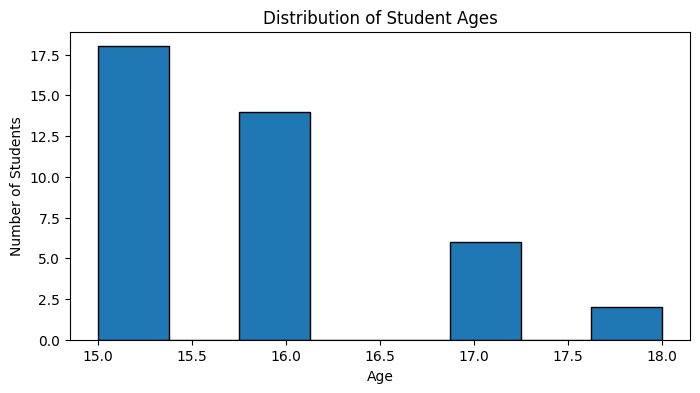

In [59]:
import matplotlib.pyplot as plt

# Age distribution
plt.figure(figsize=(8, 4))
joined_data['age'].hist(bins=8, edgecolor='black')
plt.title('Distribution of Student Ages')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.grid(False)
plt.show()


This is an early EDA chart. I grouped the data by subject (math and Portuguese) and calculated the average final grade for each one.
This helps me quickly see which subject has higher or lower average scores.
I'm not sure if I'll keep this chart for the final project, but it's helpful for understanding the data now.



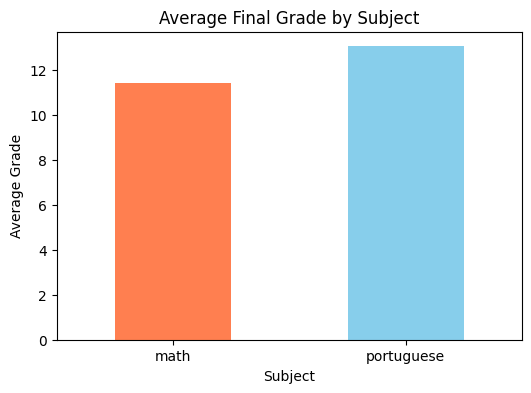

In [60]:
# I want to see the average final grade for math and portuguese

# Group the data by subject and get the average of final grades
avg_grade = joined_data.groupby('subject')['final_grade'].mean()

# Make the bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # set the size of the chart
avg_grade.plot(kind='bar', color=['coral', 'skyblue'])  # draw bar chart

# Add title and labels
plt.title('Average Final Grade by Subject')
plt.ylabel('Average Grade')
plt.xlabel('Subject')

# Make the x labels easier to read
plt.xticks(rotation=0)

# No grid lines
plt.grid(False)

# Show the chart
plt.show()
